In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14,6)

# =========================
# DONNÉES
# =========================

rendements_A = np.array([
1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

capital = 500000
rf = 3


PARTIE 1 — STATISTIQUES & VaR
Stats A : (np.float64(0.9375), np.float64(0.47714048610263715), np.float64(1.0), np.float64(11.848593740999647), np.float64(1.6528631285557587))
Stats B : (np.float64(2.891666666666666), np.float64(4.447365284189561), np.float64(4.7), np.float64(40.78695799529177), np.float64(15.406125264068637))


/tmp/ipython-input-990365767.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([rendements_A, rendements_B], labels=["A","B"])


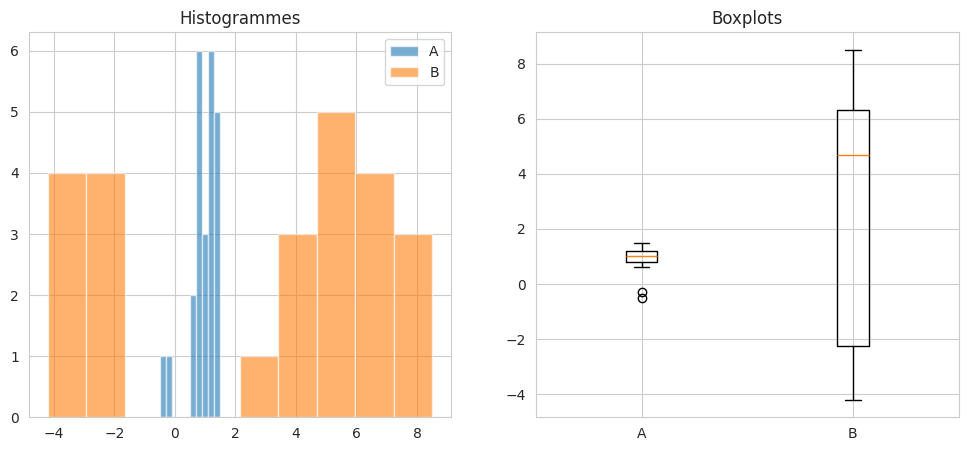

VaR A (%) : (np.float64(0.15021819793064872), np.float64(9.121369578882645))
VaR B (%) : (np.float64(-4.44648605224611), np.float64(15.366851309578522))
Perte annuelle A (€): 45606.84789441322
Perte annuelle B (€): 76834.25654789261
Sharpe A : 5.353494544180064
Sharpe B : 2.4527230142300254

PARTIE 2 — THÉORÈME DE BAYES
Prior : 0.05
Après retard : 0.29629629629629634
Après découvert : 0.6459627329192548


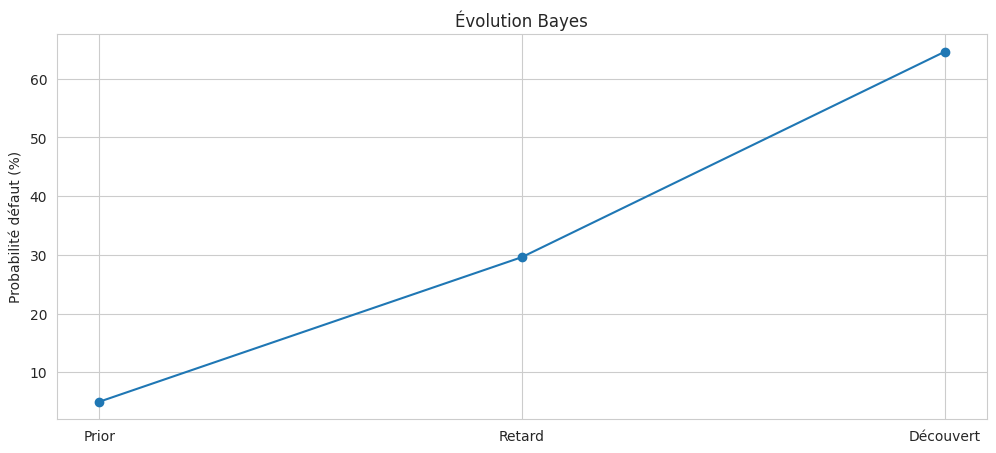


PARTIE 3 — KNN CREDIT SCORING
   age       salaire  anciennete         dette     ratio  nb_credits  retards  \
0   63  45103.995164    5.410851  12501.672018  0.277174           3        1   
1   53  27449.913245    5.281147  16211.862596  0.590598           1        1   
2   39  41057.070752    1.445616      0.000000  0.000000           5        2   
3   32  38278.857963    5.255189  24702.084283  0.645319           1        1   
4   45  48394.819076    1.193406  20000.576705  0.413279           1        2   

        score  defaut  
0  632.712692       0  
1  622.775748       0  
2  617.430942       0  
3  725.575805       0  
4  711.167106       0  
Taux défaut : 0.167
    K       AUC
0   1  0.520277
1   3  0.514504
2   5  0.526775
3   7  0.528160
4   9  0.536740
5  11  0.544011
6  15  0.560310
7  20  0.585049
8  25  0.594307
9  30  0.600152


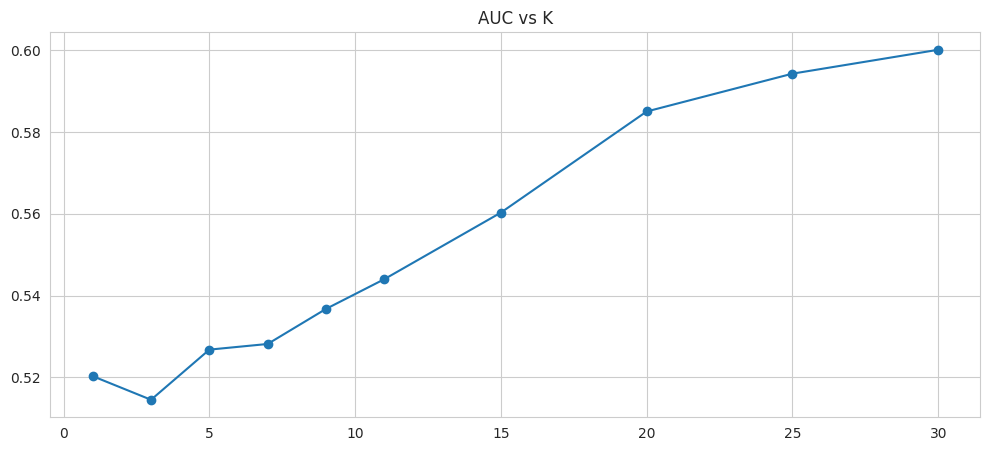

K optimal : 30
[[499   1]
 [100   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       500
           1       0.00      0.00      0.00       100

    accuracy                           0.83       600
   macro avg       0.42      0.50      0.45       600
weighted avg       0.69      0.83      0.76       600

AUC final : 0.5846199999999999


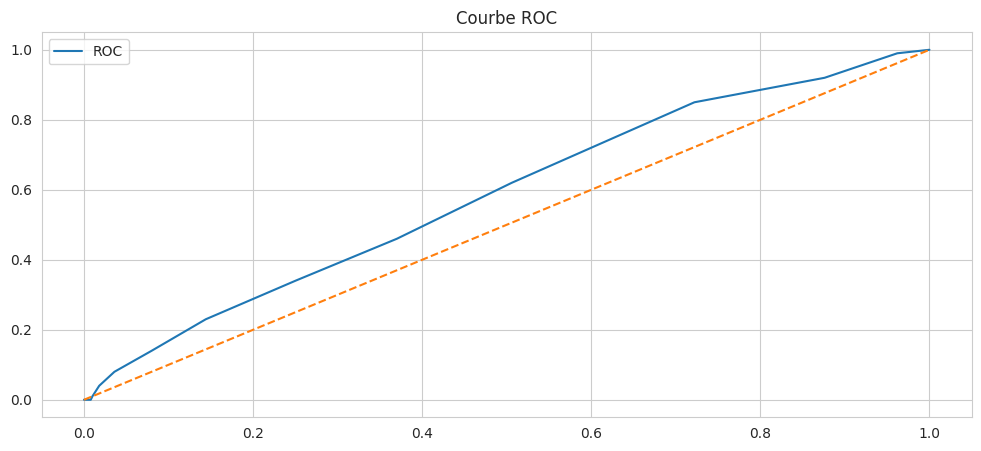


TP TERMINÉ AVEC SUCCÈS 🚀


In [1]:
# ============================================================
# TP INTELLIGENCE ARTIFICIELLE EN FINANCE
# PARTIE 1 + PARTIE 2 + PARTIE 3
# ============================================================

# =========================
# IMPORTS
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,5)

print("="*70)
print("PARTIE 1 — STATISTIQUES & VaR")
print("="*70)

# =========================
# DONNÉES PORTEFEUILLES
# =========================
rendements_A = np.array([
1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

capital = 500000
rf = 3

def stats_portefeuille(r):
    mean = np.mean(r)
    std = np.std(r, ddof=1)
    median = np.median(r)
    r_annuel = ((1 + mean/100)**12 - 1)*100
    vol_annuel = std * np.sqrt(12)
    return mean, std, median, r_annuel, vol_annuel

stats_A = stats_portefeuille(rendements_A)
stats_B = stats_portefeuille(rendements_B)

print("Stats A :", stats_A)
print("Stats B :", stats_B)

# Histogrammes
plt.subplot(1,2,1)
plt.hist(rendements_A, bins=10, alpha=0.6, label='A')
plt.hist(rendements_B, bins=10, alpha=0.6, label='B')
plt.legend()
plt.title("Histogrammes")

# Boxplot
plt.subplot(1,2,2)
plt.boxplot([rendements_A, rendements_B], labels=["A","B"])
plt.title("Boxplots")
plt.show()

# VaR
def calcul_var(mean, std, r_annuel, vol_annuel):
    z = -1.65
    var_m = mean + z*std
    var_a = r_annuel + z*vol_annuel
    return var_m, var_a

var_A = calcul_var(*stats_A[:2], stats_A[3], stats_A[4])
var_B = calcul_var(*stats_B[:2], stats_B[3], stats_B[4])

print("VaR A (%) :", var_A)
print("VaR B (%) :", var_B)
print("Perte annuelle A (€):", capital*var_A[1]/100)
print("Perte annuelle B (€):", capital*var_B[1]/100)

sharpe_A = (stats_A[3] - rf)/stats_A[4]
sharpe_B = (stats_B[3] - rf)/stats_B[4]
print("Sharpe A :", sharpe_A)
print("Sharpe B :", sharpe_B)

# ============================================================
print("\n"+"="*70)
print("PARTIE 2 — THÉORÈME DE BAYES")
print("="*70)

def bayes_update(prior, likelihood_pos, likelihood_neg):
    p_evidence = likelihood_pos*prior + likelihood_neg*(1-prior)
    return (likelihood_pos*prior)/p_evidence

prior = 0.05
posterior1 = bayes_update(prior, 0.80, 0.10)
posterior2 = bayes_update(posterior1, 0.65, 0.15)

print("Prior :", prior)
print("Après retard :", posterior1)
print("Après découvert :", posterior2)

plt.plot([0,1,2], [prior*100, posterior1*100, posterior2*100], marker='o')
plt.xticks([0,1,2], ["Prior","Retard","Découvert"])
plt.ylabel("Probabilité défaut (%)")
plt.title("Évolution Bayes")
plt.show()

# ============================================================
print("\n"+"="*70)
print("PARTIE 3 — KNN CREDIT SCORING")
print("="*70)

np.random.seed(42)
n_samples = 2000

age = np.random.randint(25, 66, n_samples)
salaire = np.random.normal(50000, 20000, n_samples).clip(20000,120000)
anciennete = np.random.exponential(5, n_samples).clip(0,30)
dette = np.random.normal(25000,15000,n_samples).clip(0,80000)
ratio = dette/salaire
nb_credits = np.random.poisson(1.5,n_samples).clip(0,5)
retards = np.random.poisson(2,n_samples).clip(0,10)
score = np.random.normal(650,100,n_samples).clip(300,850)

defaut_proba = (
0.05 +
0.15*(ratio>0.5) +
0.10*(retards>3) +
0.08*(score<600) +
0.05*(nb_credits>2)
).clip(0,0.85)

defaut = (np.random.rand(n_samples) < defaut_proba).astype(int)

df = pd.DataFrame({
'age':age,'salaire':salaire,'anciennete':anciennete,
'dette':dette,'ratio':ratio,'nb_credits':nb_credits,
'retards':retards,'score':score,'defaut':defaut
})

print(df.head())
print("Taux défaut :", df["defaut"].mean())

X = df.drop("defaut", axis=1)
y = df["defaut"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Recherche K optimal
k_values = [1,3,5,7,9,11,15,20,25,30]
results = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    results.append([k, auc.mean()])

results_df = pd.DataFrame(results, columns=["K","AUC"])
print(results_df)

plt.plot(results_df["K"], results_df["AUC"], marker='o')
plt.title("AUC vs K")
plt.show()

best_k = results_df.loc[results_df["AUC"].idxmax(),"K"]
print("K optimal :", best_k)

model = KNeighborsClassifier(n_neighbors=int(best_k))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC final :", roc_auc_score(y_test, y_proba))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("Courbe ROC")
plt.show()

print("\nTP TERMINÉ AVEC SUCCÈS 🚀")
